Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones

Autores: Matías Oria, Antonela Sambuceti, Pamela Pairo, Benjamín Ocampo

## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura del dataset

In [2]:
URL_TRAIN_DATA = "https://www.famaf.unc.edu.ar/~nocampo043/travel_insurance_prediction_train.csv"
URL_TEST_DATA = "https://www.famaf.unc.edu.ar/~nocampo043/travel_insurance_prediction_test.csv"

df_train = pd.read_csv(URL_TRAIN_DATA)
df_test = pd.read_csv(URL_TEST_DATA)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [5]:
df_train

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...
1485,1486,31,Government Sector,No,300000,5,0,No,No,0
1486,1487,31,Private Sector/Self Employed,Yes,950000,3,0,Yes,No,0
1487,1488,28,Private Sector/Self Employed,Yes,1250000,5,0,No,No,0
1488,1489,31,Government Sector,Yes,1300000,5,0,No,No,0


In [6]:
df_test

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes
...,...,...,...,...,...,...,...,...,...
492,1983,33,Government Sector,Yes,1750000,6,0,No,No
493,1984,25,Private Sector/Self Employed,No,1150000,3,1,No,No
494,1985,29,Private Sector/Self Employed,Yes,1050000,5,0,No,No
495,1986,25,Government Sector,Yes,750000,2,0,No,Yes


## Análisis descriptivo

In [7]:
df_train.describe().round()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0
mean,746.0,30.0,927819.0,5.0,0.0,0.0
std,430.0,3.0,381172.0,2.0,0.0,0.0
min,1.0,25.0,300000.0,2.0,0.0,0.0
25%,373.0,28.0,600000.0,4.0,0.0,0.0
50%,746.0,29.0,900000.0,5.0,0.0,0.0
75%,1118.0,32.0,1250000.0,6.0,1.0,1.0
max,1490.0,35.0,1800000.0,9.0,1.0,1.0


### Variable objetivo o target: Travel Insurance

In [8]:
df_train["TravelInsurance"].value_counts()

0    958
1    532
Name: TravelInsurance, dtype: int64

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

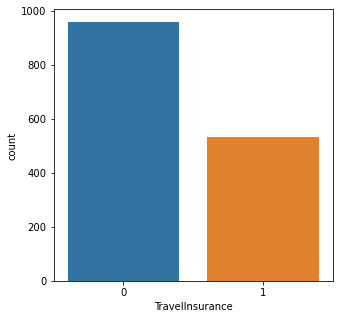

In [9]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train, x="TravelInsurance")

### Correlación variables

In [10]:
corr = df_train[["TravelInsurance", "AnnualIncome", "Age"]].corr().round(2)
corr = corr[['TravelInsurance']]
corr.loc[:, 'abs_corr'] = np.abs(corr['TravelInsurance'])
corr.sort_values(by='abs_corr', ascending=False)

,TravelInsurance,abs_corr
TravelInsurance,1.00,1.00
AnnualIncome,0.40,0.40
Age,0.07,0.07


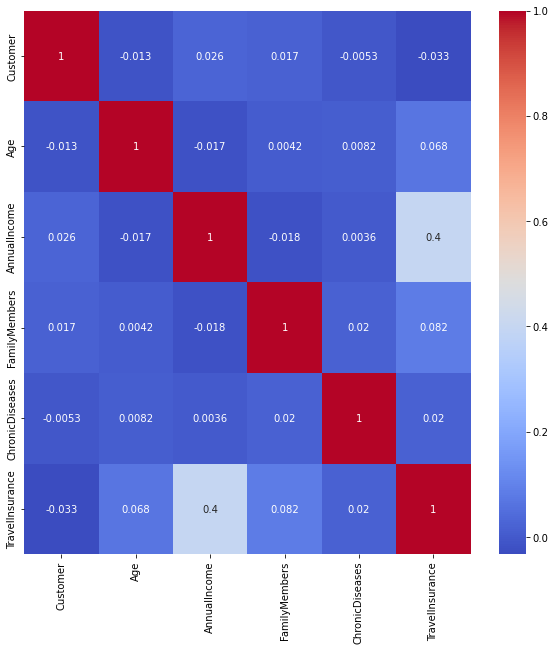

In [11]:
plt.figure(figsize=(10, 10))
corr = df_train.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap='coolwarm')
plt.show()

### Variable explicativa: Age

En primer lugar, observamos la distribución de la variable Age en el df_train.

<AxesSubplot:xlabel='Age', ylabel='count'>

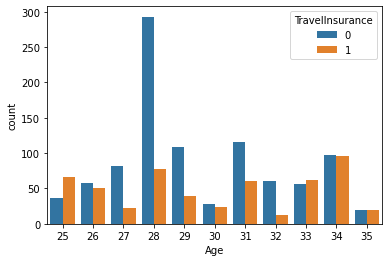

In [12]:
sns.countplot(data=df_train, x="Age", hue="TravelInsurance")

In [13]:
df_train[["TravelInsurance", "Age"]].groupby("TravelInsurance").describe()

Age                                                   
                 count       mean       std   min   25%   50%   75%   max
TravelInsurance                                                          
0                958.0  29.520877  2.623956  25.0  28.0  29.0  31.0  35.0
1                532.0  29.930451  3.279919  25.0  27.0  30.0  33.0  35.0

Podemos observar que se encuentran fluctuaciones con respecto a la edad.

### Variable explicativa: AnnualIncome

En segundo lugar, observamos la distribución de la variable Annual Income en el df_train.

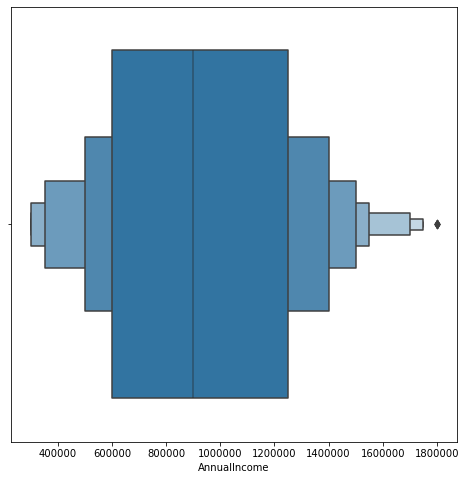

In [14]:
fig = plt.figure(figsize=(8, 8))
sns.boxenplot(data=df_train, x="AnnualIncome")
plt.ticklabel_format(style='plain', axis='x')

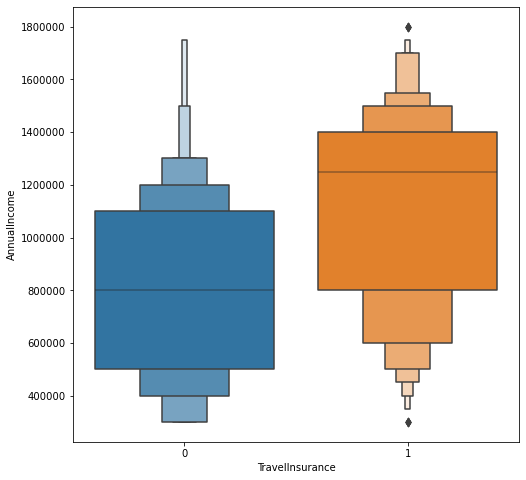

In [15]:
fig = plt.figure(figsize=(8, 8))
sns.boxenplot(data=df_train, x="TravelInsurance", y="AnnualIncome")
plt.ticklabel_format(style='plain', axis='y')

In [16]:
(df_train[["TravelInsurance",
           "AnnualIncome"]].groupby(["TravelInsurance"]).describe())

AnnualIncome                                                   \
                       count          mean            std       min       25%   
TravelInsurance                                                                 
0                      958.0  8.155010e+05  334762.832654  300000.0  500000.0   
1                      532.0  1.130075e+06  376433.348548  300000.0  800000.0   

                                                  
                       50%        75%        max  
TravelInsurance                                   
0                 800000.0  1100000.0  1750000.0  
1                1250000.0  1400000.0  1800000.0

Podemos observar que la distribución de la variable Annual Income se ve afectada en gran medida, al condicionarla por las distintas clases de la variable TARGET. Si bien los valores mínimos y máximos son similares, la media y la mediana difieren considerablemente, como así también el rango intercuantil.
Es una varible que se considera importante para explicar el comportamiento de Y.

### Variable explicativa: Employment Type

In [17]:
df_train["Employment Type"].value_counts()
pd.crosstab(df_train["TravelInsurance"], df_train["GraduateOrNot"])

GraduateOrNot,No,Yes
TravelInsurance,,
0,141,817
1,81,451


Employment Type,Government Sector,Private Sector/Self Employed
TravelInsurance,,
0,333,625
1,100,432


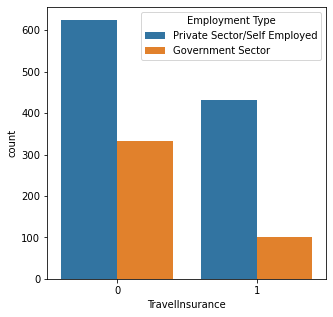

In [18]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train,
              x="TravelInsurance",
              hue=df_train["Employment Type"])
pd.crosstab(df_train["TravelInsurance"], df_train["Employment Type"])

### Variable explicativa: Graduate Or Not

In [19]:
df_train["GraduateOrNot"].value_counts()

Yes    1268
No      222
Name: GraduateOrNot, dtype: int64

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

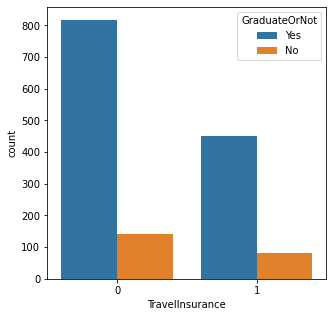

In [20]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train,
              x="TravelInsurance",
              hue=df_train["GraduateOrNot"])

In [21]:
df_train

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...
1485,1486,31,Government Sector,No,300000,5,0,No,No,0
1486,1487,31,Private Sector/Self Employed,Yes,950000,3,0,Yes,No,0
1487,1488,28,Private Sector/Self Employed,Yes,1250000,5,0,No,No,0
1488,1489,31,Government Sector,Yes,1300000,5,0,No,No,0


### Variable explicativa: Frequent Flyer

In [22]:
df_train["FrequentFlyer"].value_counts()

No     1173
Yes     317
Name: FrequentFlyer, dtype: int64

### Variable explicativa: Ever Travelled Abroad

In [23]:
df_train["EverTravelledAbroad"].value_counts()

No     1202
Yes     288
Name: EverTravelledAbroad, dtype: int64

### Variable explicativa: Employment Type

<AxesSubplot:xlabel='Employment Type', ylabel='count'>

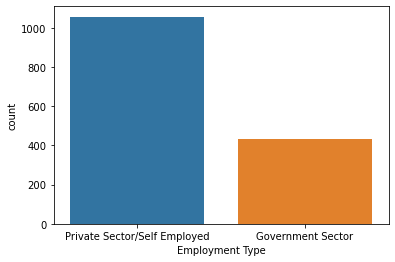

In [24]:
sns.countplot(data=df_train, x="Employment Type")

### Variable explicativa: Family Members

In [25]:
df_train.columns

Index(['Customer', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

<AxesSubplot:xlabel='FamilyMembers', ylabel='Count'>

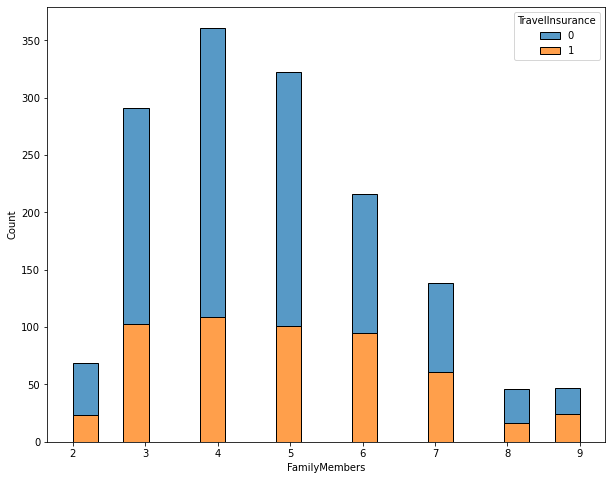

In [26]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df_train,
             x="FamilyMembers",
             hue='TravelInsurance',
             multiple="stack")

### Variable explicativa: Chronic Diseases

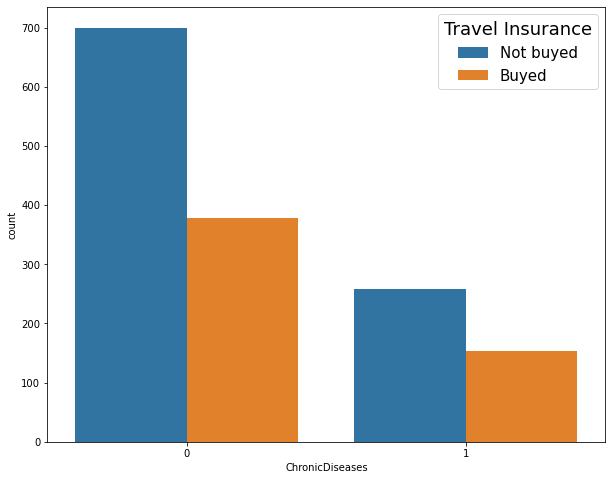

In [27]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_train, x="ChronicDiseases", hue="TravelInsurance")
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(
    legend_labels,
    ['Not buyed', 'Buyed'],  #ver de cambiar!
    title_fontsize=18,
    fontsize=15,
    bbox_to_anchor=(1, 1),
    title='Travel Insurance')

### Variable explicativa: FrequentFlyer

FrequentFlyer,No,Yes
TravelInsurance,,
0,823,135
1,350,182


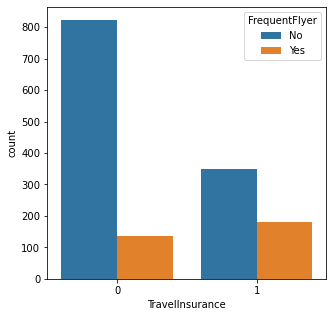

In [28]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train, x="TravelInsurance", hue=df_train.FrequentFlyer)

pd.crosstab(df_train["TravelInsurance"], df_train["FrequentFlyer"])

Se puede observar en este gráfico que si no sos viajero frecuente la cantidad
de clientes que contratan un seguro es baja, caso contrario la cantidad de
contratar un seguro es pareja.

### Variable explicativa: EverTravelledAbroad

EverTravelledAbroad,No,Yes
TravelInsurance,,
0,896,62
1,306,226


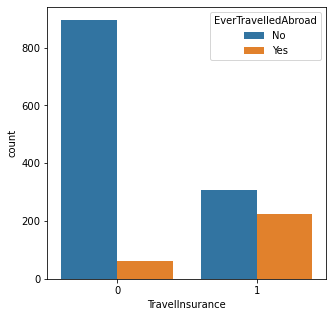

In [29]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train,
              x="TravelInsurance",
              hue=df_train.EverTravelledAbroad)

pd.crosstab(df_train["TravelInsurance"], df_train["EverTravelledAbroad"])